# Draw maps with Python

## Install required libraries


In [26]:
%pip install matplotlib basemap


Note: you may need to restart the kernel to use updated packages.


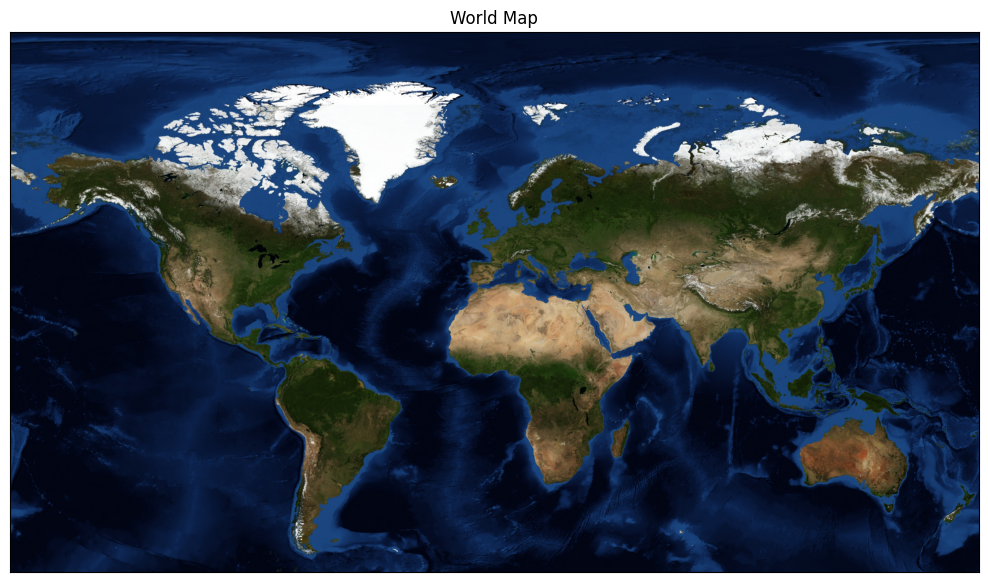

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='l')

# Desired dimensions in pixels
width_px = 1200
height_px = 800

# Convert pixels to inches (1 inch = 96 pixels)
width_in = width_px / 96
height_in = height_px / 96

# Set the figure size (width, height) in inches
plt.figure(figsize=(width_in, height_in))

# Draw map features
#m.drawcoastlines()
#m.drawcountries()
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='coral', lake_color='aqua')

# Draw the "blue marble" map
m.bluemarble()

# Display the map
plt.title("World Map")
plt.show()

## Calculate satellite positions

In this code we are using the `numpy` library to calculate a simple circular orbit.

- We calculate a 200 km altitude orbit and assume a Earth radius of 6371.km
- We use the `np.linspace()` function to generate 100 points over the orbit distributed equally. Notice that `theta` is an array of 100 points between 0 and $2\Pi$.
- The inclination is 0.
- We use `sin` and `cos` function to calculate the earth centered position x,y,z of the 100 points. `x`,`y`,`z` are also an array of 100 points.
- Finally we convert the positions to longitude and latitude. `np.degrees` convert radians to degrees.

In [41]:
import numpy as np

# Earth radius and altitude of the satellite in km
earth_radius = 6371.0
altitude = 200.0
orbit_radius = earth_radius + altitude

# Number of points to plot the orbit
num_points = 100
theta = np.linspace(0, 2*np.pi, num_points)

# Inclination of the orbit in degrees (0 for equatorial)
inclination = 20.0

# Calculate the x, y, z positions of the orbit in 3D space
x = orbit_radius * np.cos(theta)
y = orbit_radius * np.sin(theta) * np.cos(np.radians(inclination))
z = orbit_radius * np.sin(theta) * np.sin(np.radians(inclination))

# Convert 3D positions to latitude and longitude
latitude = np.degrees(np.arcsin(z / orbit_radius))
longitude = np.degrees(np.arctan2(y, x))

For checking type and dimensions of the variables, you can use the following code:

In [42]:
print(type(longitude))
# show dimensions of ndarray
print(longitude.shape)

<class 'numpy.ndarray'>
(100,)


We can also print the points of the orbit over the map. Now, ew are using map features `m.drawcoastalines()`,`m.drawcountries()`... because they are faster than not `m.bluemarble()`.

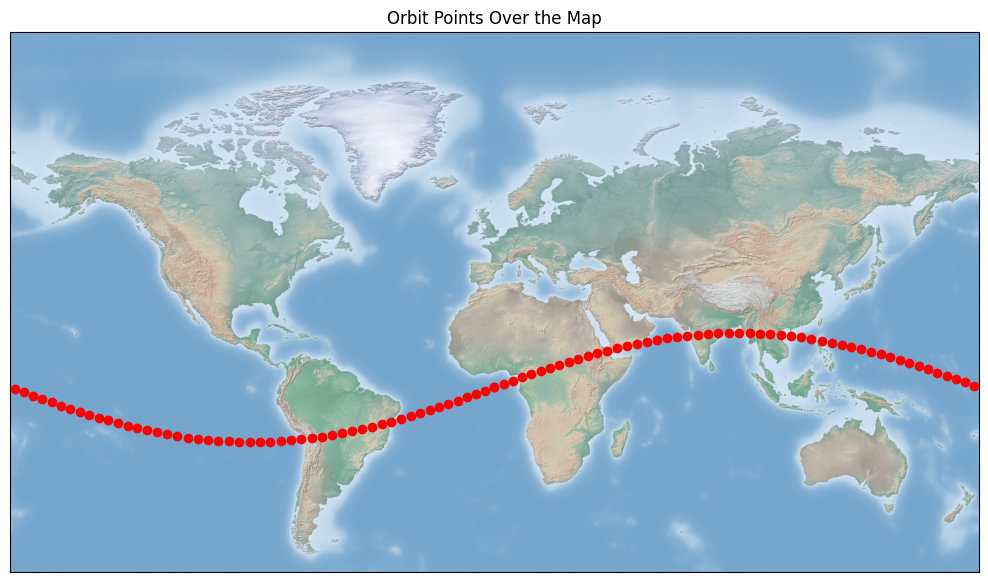

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Desired dimensions in pixels
width_px = 1200
height_px = 800

# Convert pixels to inches (1 inch = 96 pixels)
width_in = width_px / 96
height_in = height_px / 96

# Set the figure size (width, height) in inches
plt.figure(figsize=(width_in, height_in))

# Create a Basemap instance
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='l')

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral', lake_color='aqua')

# Convert latitude and longitude to map projection coordinates
x, y = m(longitude, latitude)

# Plot the points on the map
m.scatter(x, y, marker='o', color='red', zorder=5)

# Display the map
plt.title("Orbit Points Over the Map")
plt.show()